In [1]:
import numpy as np
import pandas as pd

C:\Users\jatin\AppData\Local\Temp\ipykernel_9772\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cleaning business Datasets

In [2]:
business = pd.read_csv('business.csv')

In [3]:
business.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [4]:
business.shape

(93487, 11)

In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


## Clean and process 'stop' column

In [6]:
business['stop'].value_counts()

stop
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                      8102
2+-stop                                                                       1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t         71

In [7]:
business['stop_type'] = business['stop'].str[:8]
business['stop_type'].value_counts()

stop_type
1-stop\n\t    84302
non-stop       8102
2+-stop        1083
Name: count, dtype: int64

In [8]:
business['stop_type'] = business['stop_type'].map({
    '1-stop\n\t': 'one',
    'non-stop': 'zero',
    '2+-stop': 'two+'
})
business.drop('stop', axis=1, inplace=True)

In [9]:
business['stop_type'].value_counts()

stop_type
one     84302
zero     8102
two+     1083
Name: count, dtype: int64

## Process flight codes and airline

In [10]:
business['airline'].value_counts()

airline
Vistara      60589
Air India    32898
Name: count, dtype: int64

In [11]:
business['ch_code'].value_counts()

ch_code
UK    60589
AI    32898
Name: count, dtype: int64

In [12]:
business['flight'] = business['ch_code'] + '-' + business['num_code'].astype('str')
business.drop(['ch_code', 'num_code'], axis=1, inplace=True)

## Convert 'time_taken' to 'duration' (hh:mm into hours)

In [13]:
def convert_to_minutes(time_str):
    try:
        hours, minutes = time_str.split('h ')
        hours = float(hours)
        minutes = float(minutes.replace('m', ''))
        total_minutes = hours * 60 + minutes
        return round(total_minutes / 60, 2)
    except ValueError:
        print(f"Skipping invalid format: {time_str}")
        return np.nan

business['duration'] = business['time_taken'].apply(convert_to_minutes)
business.drop(['time_taken'], axis=1, inplace=True)

## Rename columns

In [14]:
business.rename(columns={
    'dep_time': 'departure_time',
    'arr_time': 'arrival_time',
    'to': 'destination_city',
    'from': 'source_city'
}, inplace=True)

## Categorize 'arrival_time' and 'departure_time'

In [15]:
def categorize_time(time_str):
    hour = int(time_str.split(':')[0])
    if 4 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 19:
        return 'Early Evening'
    elif 19 <= hour < 22:
        return 'Evening'
    elif 22 <= hour < 24 or 0 <= hour < 4:
        return 'Night'
    else:
        return 'Unknown'

business['arrival_time'] = business['arrival_time'].apply(categorize_time)
business['departure_time'] = business['departure_time'].apply(categorize_time)

## Process 'date' to 'days_left'

In [16]:
dd = pd.DataFrame(business["date"].str.split("-", expand=True).to_numpy().astype(int), columns=["day", "month", "year"])
dd1 = np.where(dd["month"] > 2, dd["day"] + 18, np.where(dd["month"] == 2, dd["day"] - 10, dd["day"]))
business["days_left"] = dd1
business.drop('date', axis=1, inplace=True)

## Process price into integer

In [17]:
business['price'] = business['price'].str.replace(',', '').astype('int')

# **Final Business DataFrame**

In [18]:
business.head()

,airline,departure_time,source_city,arrival_time,destination_city,price,stop_type,flight,duration,days_left
0,Air India,Early Evening,Delhi,Evening,Mumbai,25612,zero,AI-868,2.00,1
1,Air India,Evening,Delhi,Evening,Mumbai,25612,zero,AI-624,2.25,1
2,Air India,Evening,Delhi,Evening,Mumbai,42220,one,AI-531,24.75,1
3,Air India,Evening,Delhi,Night,Mumbai,44450,one,AI-839,26.50,1
4,Air India,Early Evening,Delhi,Night,Mumbai,46690,one,AI-544,6.67,1


# Cleaning Economy datasets

In [19]:
economy = pd.read_csv('economy.csv')

In [20]:
economy.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [21]:
economy.shape

(206774, 11)

In [22]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


## Clean and process 'stop' column

In [23]:
economy['stop'].value_counts()
economy['stop'] = economy['stop'].str[:8]
economy['stop'].value_counts()
economy['stop_type'] = economy['stop'].map({
    '1-stop\n\t': 'one',
    'non-stop': 'zero',
    '2+-stop': 'two+'
})
economy.drop(['stop'], axis=1, inplace=True)

## Process flight codes

In [24]:
economy['ch_code'].value_counts()
economy['flight'] = economy['ch_code'] + '-' + economy['num_code'].astype('str')
economy.drop(['ch_code', 'num_code'], axis=1, inplace=True)

## Convert 'time_taken' to 'duration'

In [25]:
def convert_to_minutes(time_str):
    try:
        hours, minutes = time_str.split('h ')
        hours = float(hours)
        minutes = float(minutes.replace('m', ''))
        total_minutes = hours * 60 + minutes
        return round(total_minutes / 60, 2)
    except ValueError:
        print(f"Skipping invalid format: {time_str}")
        return np.nan

economy['duration'] = economy['time_taken'].apply(convert_to_minutes)
economy.dropna(subset=['duration'], inplace=True)
economy.drop('time_taken', axis=1, inplace=True)

Skipping invalid format: 1.03h m
Skipping invalid format: 1.02h m
Skipping invalid format: 1.03h m
Skipping invalid format: 1.01h m


## Rename columns

In [26]:
economy.rename(columns={
    'dep_time': 'departure_time',
    'arr_time': 'arrival_time',
    'to': 'destination_city',
    'from': 'source_city'
}, inplace=True)

## Categorize 'arrival_time' and 'departure_time'

In [27]:
economy['arrival_time'] = economy['arrival_time'].apply(categorize_time)
economy['departure_time'] = economy['departure_time'].apply(categorize_time)

## Process 'date' to 'days_left'

In [28]:
dd = pd.DataFrame(economy["date"].str.split("-", expand=True).to_numpy().astype(int), columns=["day", "month", "year"])
dd1 = np.where(dd["month"] > 2, dd["day"] + 18, np.where(dd["month"] == 2, dd["day"] - 10, dd["day"]))
economy["days_left"] = dd1
economy.drop('date', axis=1, inplace=True)

## Process price into integer

In [29]:
economy['price'] = economy['price'].str.replace(',', '').astype('int')

# **Final Economy DataFrame**

In [30]:
economy.head()

,airline,departure_time,source_city,arrival_time,destination_city,price,stop_type,flight,duration,days_left
0,SpiceJet,Early Evening,Delhi,Evening,Mumbai,5953,zero,SG-8709,2.17,1
1,SpiceJet,Early Morning,Delhi,Morning,Mumbai,5953,zero,SG-8157,2.33,1
2,AirAsia,Early Morning,Delhi,Early Morning,Mumbai,5956,zero,I5-764,2.17,1
3,Vistara,Morning,Delhi,Afternoon,Mumbai,5955,zero,UK-995,2.25,1
4,Vistara,Morning,Delhi,Morning,Mumbai,5955,zero,UK-963,2.33,1


# Time to merge these two datasets into one

In [31]:
economy = economy[['flight', 'airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'duration', 'days_left', 'stop_type', 'price']]
economy['class'] = 'economy'

In [32]:
business = business[['flight', 'airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'duration', 'days_left', 'stop_type', 'price']]
business['class'] = 'business'

In [33]:
business.head()

,flight,airline,source_city,destination_city,departure_time,arrival_time,duration,days_left,stop_type,price,class
0,AI-868,Air India,Delhi,Mumbai,Early Evening,Evening,2.00,1,zero,25612,business
1,AI-624,Air India,Delhi,Mumbai,Evening,Evening,2.25,1,zero,25612,business
2,AI-531,Air India,Delhi,Mumbai,Evening,Evening,24.75,1,one,42220,business
3,AI-839,Air India,Delhi,Mumbai,Evening,Night,26.50,1,one,44450,business
4,AI-544,Air India,Delhi,Mumbai,Early Evening,Night,6.67,1,one,46690,business


In [34]:
economy.head()

,flight,airline,source_city,destination_city,departure_time,arrival_time,duration,days_left,stop_type,price,class
0,SG-8709,SpiceJet,Delhi,Mumbai,Early Evening,Evening,2.17,1,zero,5953,economy
1,SG-8157,SpiceJet,Delhi,Mumbai,Early Morning,Morning,2.33,1,zero,5953,economy
2,I5-764,AirAsia,Delhi,Mumbai,Early Morning,Early Morning,2.17,1,zero,5956,economy
3,UK-995,Vistara,Delhi,Mumbai,Morning,Afternoon,2.25,1,zero,5955,economy
4,UK-963,Vistara,Delhi,Mumbai,Morning,Morning,2.33,1,zero,5955,economy


In [35]:
df = pd.concat([business, economy], ignore_index=True)

In [36]:
df.head()

,flight,airline,source_city,destination_city,departure_time,arrival_time,duration,days_left,stop_type,price,class
0,AI-868,Air India,Delhi,Mumbai,Early Evening,Evening,2.00,1,zero,25612,business
1,AI-624,Air India,Delhi,Mumbai,Evening,Evening,2.25,1,zero,25612,business
2,AI-531,Air India,Delhi,Mumbai,Evening,Evening,24.75,1,one,42220,business
3,AI-839,Air India,Delhi,Mumbai,Evening,Night,26.50,1,one,44450,business
4,AI-544,Air India,Delhi,Mumbai,Early Evening,Night,6.67,1,one,46690,business


In [37]:
df.shape

(300257, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300257 entries, 0 to 300256
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flight            300257 non-null  object 
 1   airline           300257 non-null  object 
 2   source_city       300257 non-null  object 
 3   destination_city  300257 non-null  object 
 4   departure_time    300257 non-null  object 
 5   arrival_time      300257 non-null  object 
 6   duration          300257 non-null  float64
 7   days_left         300257 non-null  int64  
 8   stop_type         300257 non-null  object 
 9   price             300257 non-null  int64  
 10  class             300257 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [39]:
df.to_csv('Cleaned_df.csv')

EDA

In [40]:
df.describe()

,duration,days_left,price
count,300257.000000,300257.000000,300257.000000
mean,12.217943,26.004609,20883.926526
std,7.192893,13.561023,22695.990185
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [41]:
df['airline'].value_counts() # we can use onehot encoding for this feature

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23173
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

In [42]:
for x in ('departure_time', 'arrival_time', 'airline', 'stop_type'):
    print("__________________________________________________________________________________")
    print(f"{df[x].value_counts()}")
    print("__________________________________________________________________________________")

__________________________________________________________________________________
departure_time
Morning          75250
Early Morning    62039
Evening          59603
Early Evening    47332
Afternoon        46858
Night             9175
Name: count, dtype: int64
__________________________________________________________________________________
__________________________________________________________________________________
arrival_time
Evening          75853
Morning          63780
Night            62833
Early Evening    46002
Afternoon        37908
Early Morning    13881
Name: count, dtype: int64
__________________________________________________________________________________
__________________________________________________________________________________
airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23173
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64
___________________________________

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
top_airlines = ['Vistara', 'Air India', 'Indigo', 'Go FIRST', 'AirAsia', 'SpiceJet']

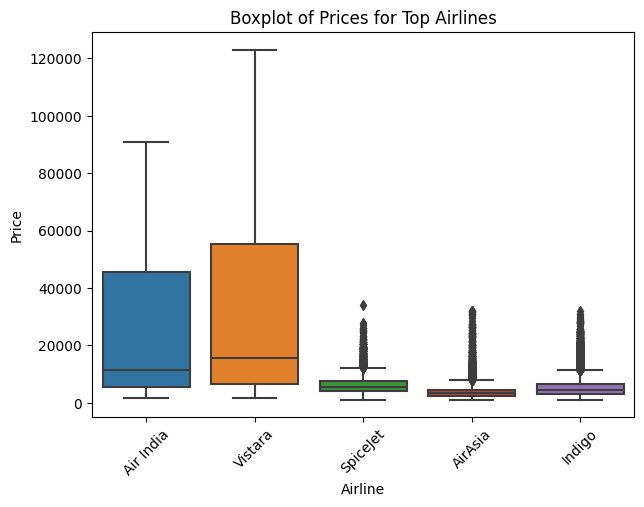

In [45]:
filtered_df = df[df['airline'].isin(top_airlines)]
# Plot the boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='airline', y='price', data=filtered_df)
plt.title('Boxplot of Prices for Top Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

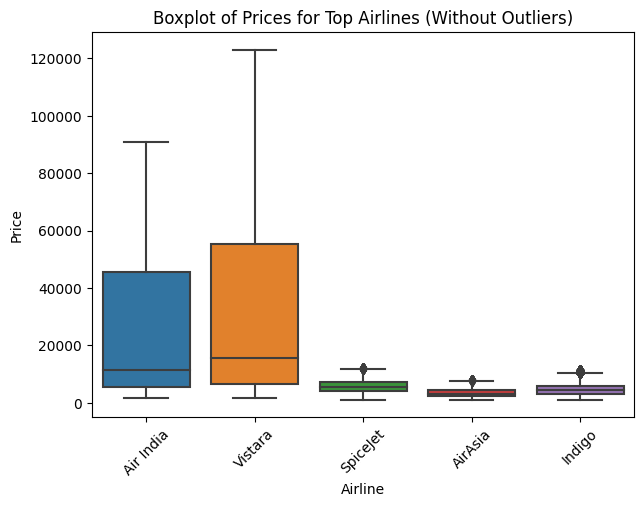

In [46]:
# Function to identify outliers using the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


filtered_df = df[df['airline'].isin(top_airlines)]

outliers = pd.DataFrame()
for airline in top_airlines:
    airline_outliers = identify_outliers(filtered_df[filtered_df['airline'] == airline], 'price')
    outliers = pd.concat([outliers, airline_outliers])


filtered_df_no_outliers = filtered_df[~filtered_df.index.isin(outliers.index)]


plt.figure(figsize=(7, 5))
sns.boxplot(x='airline', y='price', data=filtered_df_no_outliers)
plt.title('Boxplot of Prices for Top Airlines (Without Outliers)')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

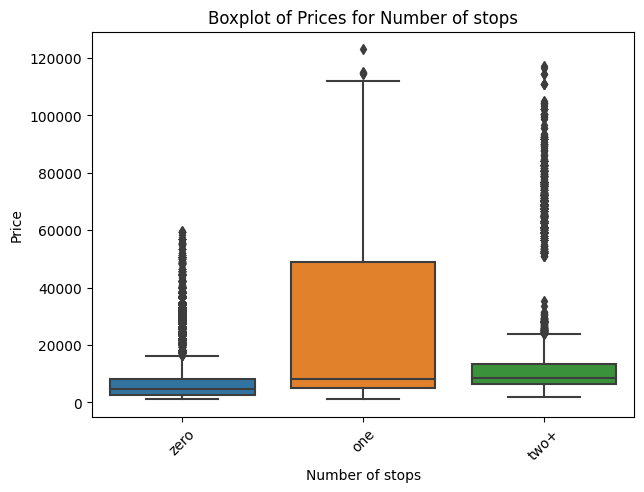

In [47]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='stop_type', y='price', data=df)
plt.title('Boxplot of Prices for Number of stops')
plt.xlabel('Number of stops')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

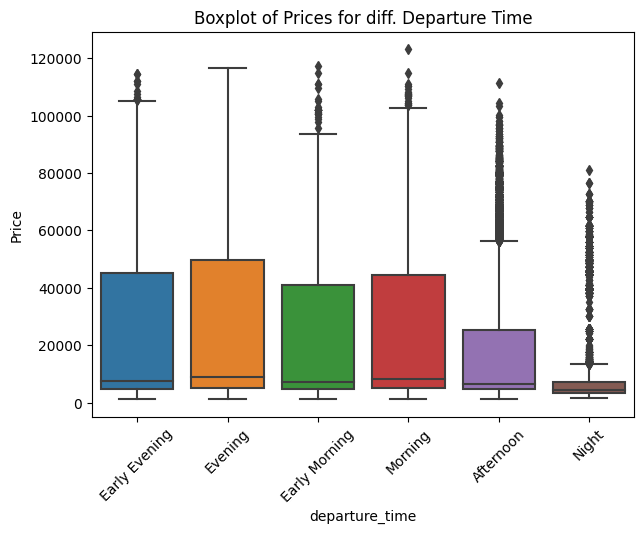

In [48]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='departure_time', y='price', data=df)
plt.title('Boxplot of Prices for diff. Departure Time')
plt.xlabel('departure_time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

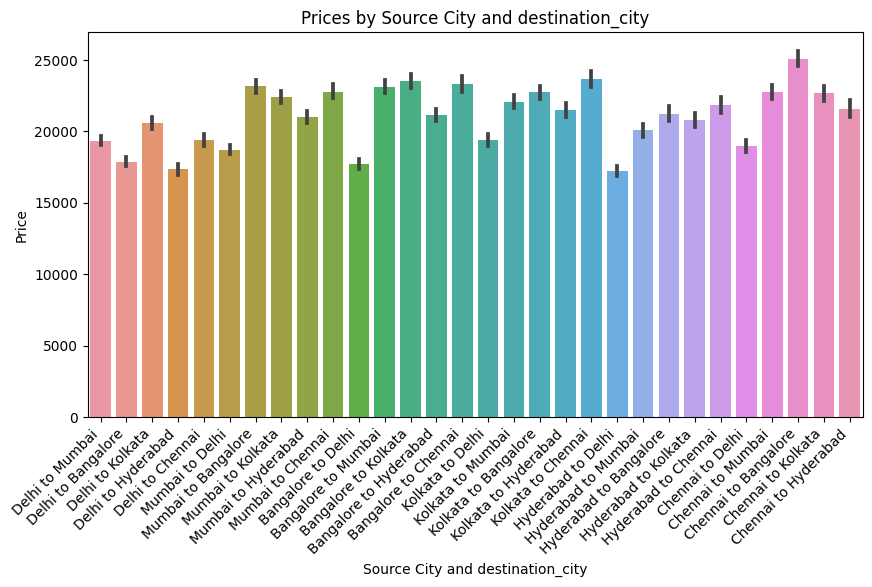

In [49]:
df['source_destination'] = df['source_city'] + ' to ' + df['destination_city']
plt.figure(figsize=(10, 5))
sns.barplot(x='source_destination', y='price', data=df)
plt.title('Prices by Source City and destination_city')
plt.xlabel('Source City and destination_city')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right') 
plt.show()


In [50]:
df['stop_type'].value_counts()

stop_type
one     250927
zero     36044
two+     13286
Name: count, dtype: int64

# Checking correlation

In [51]:
from scipy.stats import chi2_contingency # stackoverflow code :D

def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2))
    stats = chi2_contingency(crosstab)[0]
    cram_V = stats / (np.sum(crosstab) * (min(crosstab.shape) - 1))
    return cram_V

def cramers_col(column_name):
    col = pd.Series(np.empty(df.columns.shape), index=df.columns, name=column_name)
    for row in df:
        cram = cramers_V(df[column_name], df[row])
        col[row] = round(cram, 2)
    return col

corr = df.apply(lambda column: cramers_col(column.name))

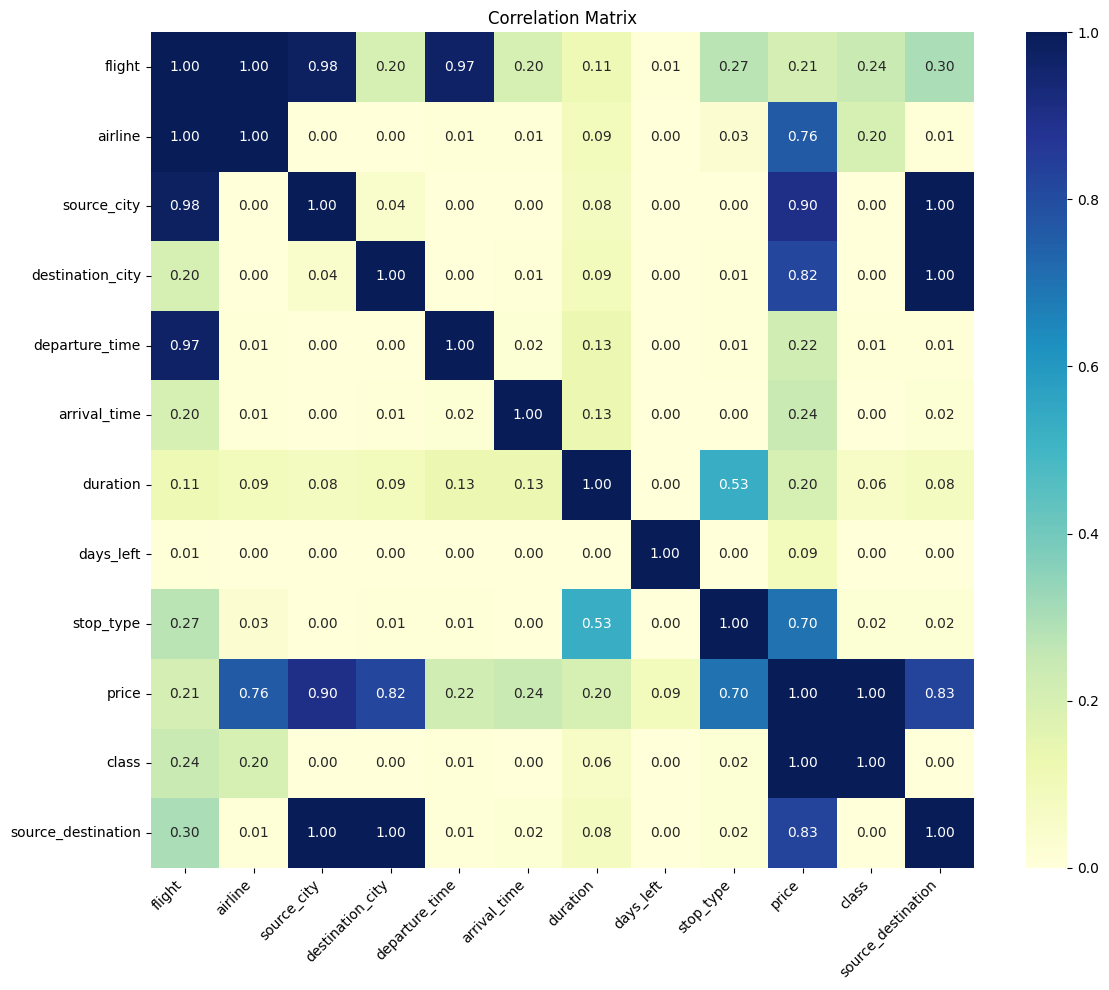

In [52]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Preprocessing

In [53]:
df.drop(['flight','source_destination'], axis=1, inplace=True)

In [54]:
from sklearn.model_selection import train_test_split
train_valid, test = train_test_split(df, train_size=0.8, shuffle=True, stratify=df['class'])

In [55]:
train, valid = train_test_split(train_valid, train_size=0.8, shuffle=True)

In [56]:
train.shape, valid.shape, test.shape

((192164, 10), (48041, 10), (60052, 10))

In [57]:
train_X, train_y = train.drop('price', axis=1).copy(), train['price'].copy()
valid_X, valid_y = valid.drop('price', axis=1).copy(), valid['price'].copy()
test_X, test_y = test.drop('price', axis=1).copy(), test['price'].copy()

In [58]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[['zero', 'one', 'two+']]))
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, ['duration', 'days_left']),
        ('ord', ordinal_pipeline, ['stop_type']),
        ('cat', cat_pipeline, ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class'])
    ],
    remainder=numerical_pipeline 
)



In [59]:
processed_data = preprocessor.fit_transform(df)

In [60]:
processed_data.shape

(300257, 38)

In [61]:
Cols = preprocessor.get_feature_names_out()

In [62]:
pd.DataFrame(data=processed_data.toarray(), columns=Cols)

,num__duration,num__days_left,ord__stop_type,cat__airline_Air India,cat__airline_AirAsia,cat__airline_GO FIRST,cat__airline_Indigo,cat__airline_SpiceJet,cat__airline_StarAir,cat__airline_Trujet,...,cat__departure_time_Night,cat__arrival_time_Afternoon,cat__arrival_time_Early Evening,cat__arrival_time_Early Morning,cat__arrival_time_Evening,cat__arrival_time_Morning,cat__arrival_time_Night,cat__class_business,cat__class_economy,remainder__price
0,-1.420563,-1.843862,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.208322
1,-1.385807,-1.843862,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.208322
2,1.742286,-1.843862,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.940083
3,1.985582,-1.843862,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.038338
4,-0.771310,-1.843862,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.137034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300252,0.224118,1.695700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.581025
300253,0.224118,1.695700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.580497
300254,1.162546,1.695700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.539476
300255,1.544869,1.695700,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.539476


# Model training

In [63]:
from sklearn.linear_model import SGDRegressor

sgd_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('sgdregressor', SGDRegressor(max_iter=1000, eta0=0.01))
])

sgd_reg.fit(train_X, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('scaler',
                                                              StandardScaler())]),
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'days_left']),
                                                 ('ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['zero',
                                                                                               'one',
                                                                                               'two+']]))]),
                                                  ['stop_type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['airline', 'source_city',
                                                   'destination_city',
                                                   'departure_time',
                                                   'arrival_time',
                                                   'class'])])),
                ('sgdregressor', SGDRegressor())])

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_reg, valid_X, valid_y, cv=3).sum()/3 * 100

90.84459204015083

In [65]:
cv_scores = cross_val_score(sgd_reg, valid_X, valid_y, cv=3, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print(cv_scores)

[46195338.91992775 46918069.61627308 47539784.39421281]


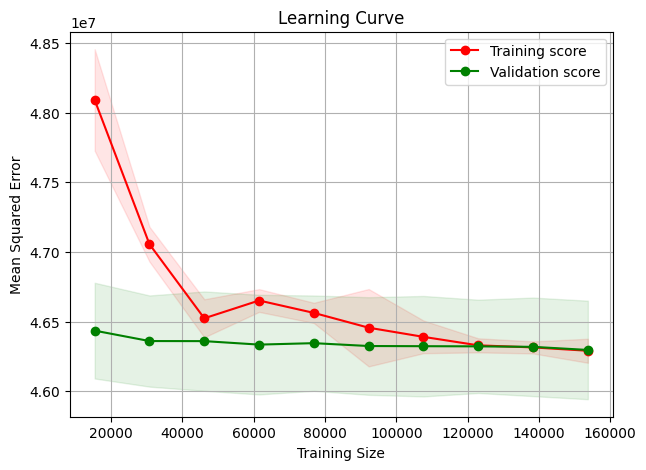

In [66]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    sgd_reg, train_X, train_y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -np.mean(train_scores, axis=1)  
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)  
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(7, 5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, valid_scores_mean, 'o-', color='g', label='Validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.grid()
plt.show()

## 1. Generalization: The model appears to generalize well as the validation error is consistently low and does not significantly increase with more training data.
## 2. Model Performance: The relatively low MSE for both training and validation sets suggests that the model performs well on both seen and unseen data.

In [67]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'sgdregressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'sgdregressor__eta0': [0.001, 0.01, 0.1],
    'sgdregressor__max_iter': [1000, 2000, 3000]
}


random_search = RandomizedSearchCV(sgd_reg, param_distributions, n_iter=45, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)


random_search.fit(train_X, train_y)

print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Best parameters found:  {'sgdregressor__max_iter': 3000, 'sgdregressor__eta0': 0.001, 'sgdregressor__alpha': 0.0001}
Best score found:  -46282223.23493992


In [68]:
final_model = random_search.best_estimator_

In [69]:
sgd_regressor = final_model.named_steps['sgdregressor']
feature_importances = sgd_regressor.coef_  # feature importances
feature_names = final_model.named_steps['preprocessor'].get_feature_names_out() # feature names from the preprocessor
feature_importances_dict = dict(zip(feature_names, feature_importances))

for feature, importance in feature_importances_dict.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: num__duration, Importance: 586.882056899432
Feature: num__days_left, Importance: -1754.694345451795
Feature: ord__stop_type, Importance: 5630.266506066594
Feature: cat__airline_Air India, Importance: 1201.958434490066
Feature: cat__airline_AirAsia, Importance: 976.7564393493288
Feature: cat__airline_GO FIRST, Importance: 3084.6262592247836
Feature: cat__airline_Indigo, Importance: 3378.4580387440687
Feature: cat__airline_SpiceJet, Importance: 3336.488328611418
Feature: cat__airline_StarAir, Importance: 269.6611788355329
Feature: cat__airline_Trujet, Importance: 17.71344023069033
Feature: cat__airline_Vistara, Importance: 5177.343259427588
Feature: cat__source_city_Bangalore, Importance: 3256.0876170428764
Feature: cat__source_city_Chennai, Importance: 3128.778909541993
Feature: cat__source_city_Delhi, Importance: 1741.2225209557
Feature: cat__source_city_Hyderabad, Importance: 1628.6008856789117
Feature: cat__source_city_Kolkata, Importance: 4721.304460801243
Feature: cat__sou


# 1. Numerical Features:
## A. duration: Positive importance (586.88), meaning that as the duration increases, the price increases.
## B. days_left: Negative importance (-1754.69), meaning that as the days left to the departure increase, the price decreases.
# 2. Ordinal Feature:
## stop_type: High positive importance (5630.27), indicating that more stops significantly increase the price variable.
# 3. Categorical Features:
## A. Airlines: Air India, AirAsia, GO FIRST, Indigo, SpiceJet, StarAir, Trujet, Vistara: All have positive coefficients, with Vistara having the highest importance (5177.34). This suggests that flights with Vistara generally have higher price values.
## B. Source and Destination Cities: Kolkata: High positive importance for both source (4721.30) and destination (4584.76), indicating that flights involving Kolkata tend to have higher price values.
## C. Departure and Arrival Times: Morning and Early Evening departures and arrivals: Generally have high positive coefficients, indicating these times are associated with higher price values.
# 4. Class:
## A. business: Very high positive importance (31327.61), indicating that business class tickets are significantly more expensive.
## B. economy: Negative importance (-13884.61), suggesting that economy class tickets are cheaper.

# Testing Model on test sets

In [70]:
from sklearn.metrics import mean_squared_error
final_predictions = final_model.predict(test_X)
final_rmse = mean_squared_error(test_y, final_predictions, squared=False)
print(final_rmse)

6797.351657336744


In [71]:
final_model.score(test_X, test_y)

0.9103646991594279

# Saving the final model:

In [72]:
import joblib

joblib.dump(final_model, "Flight_price_predictor.pkl")

['Flight_price_predictor']